In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df[df['species'] !='virginica']

In [4]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [5]:
df['species'] = df['species'].map({"setosa":0,"versicolor":1})

In [6]:
## Feature into dependent and independent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [8]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

 multi-classification problem becoz - 0,1,2

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
55,5.7,2.8,4.5,1.3
88,5.6,3.0,4.1,1.3
26,5.0,3.4,1.6,0.4
42,4.4,3.2,1.3,0.2
69,5.6,2.5,3.9,1.1
...,...,...,...,...
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [11]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [13]:
from sklearn.model_selection import GridSearchCV

parameter = {"C":[0.5,1,2,3,5,6,7,9,10,35,40],"penalty":["l1","l2",'elasticnet']}
log_regressor = GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 35, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [14]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [15]:
print(log_regressor.best_score_)

1.0


In [16]:
prediction_log = log_regressor.predict(X_test)

In [17]:
prediction_log

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,0.960307
species,0.728290,-0.690684,0.969990,0.960307,1.000000


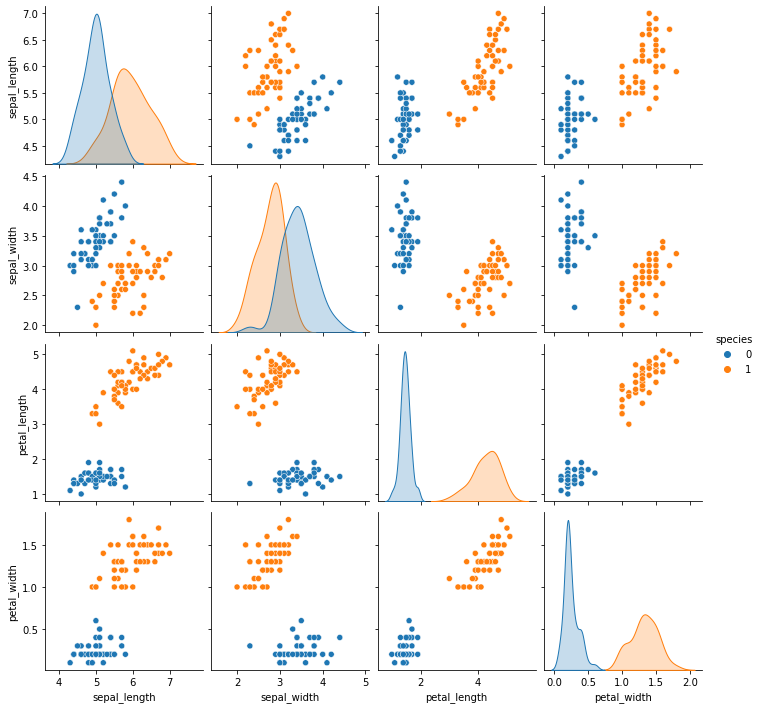

In [25]:
sns.pairplot(df,hue = 'species')

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [22]:
confusion_matrix(y_test,prediction_log)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [24]:
f1_score(y_test,prediction_log)

1.0